<a href="https://colab.research.google.com/github/sayevvv/machineLearning/blob/main/ML_Klasterisasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('/content/drive/MyDrive/MachineLearning/Iris.csv')

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


seleksi

In [4]:
# Seleksi Fitur

X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

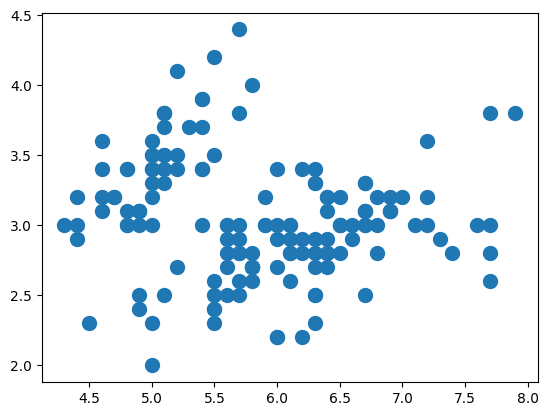

In [5]:
# Plot Data
# Karena data 4 dimensi, maka akan kita coba
# plot cluster berdasarkan Sepal Length dan Sepal Width  saja

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

In [6]:
# Buat Model KMeans
# Kali ini kita coba menggunakan k=2 - anggap saja kita tidak tahu jumlah label ada 3 :)

from sklearn.cluster import KMeans

# Inisiasi obyek KMeans
cl_kmeans = KMeans(n_clusters=2)

# Fit dan predict model
y_kmeans = cl_kmeans.fit_predict(X)

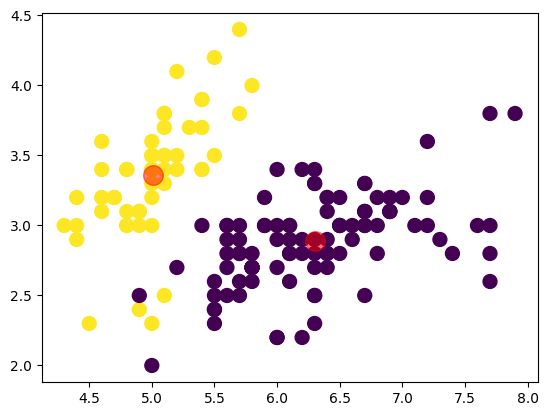

In [7]:
# Plot hasi cluster berdasarkan Sepal Length dan Sepal Width
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

In [8]:
# Cek Nilai SSE
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 152.36870647733915


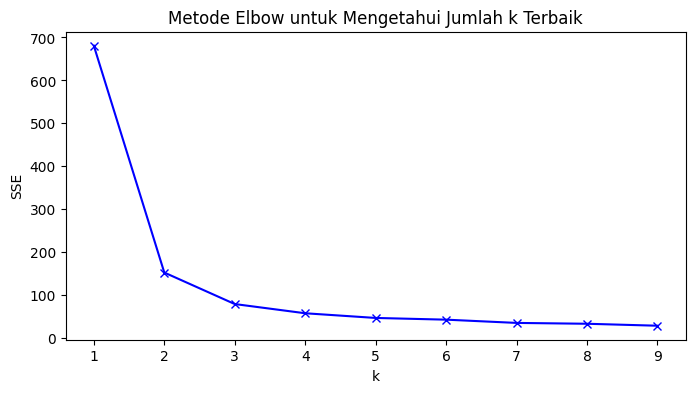

In [10]:
# Implementasi Metode Elbow

# List nilai SSE
sse = []

# Cari k terbaik dari 1-10
K = range(1,10)

# Cek nilai SSE setiap k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)


# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

In [11]:
# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=680.8243999999996
k=2; SSE=152.36870647733915
k=3; SSE=78.94506582597728
k=4; SSE=57.4732732654949
k=5; SSE=46.56163015873017
k=6; SSE=42.56646318681319
k=7; SSE=34.98311005821878
k=8; SSE=33.017852426961106
k=9; SSE=28.44838723776225


#PRAKTIKUM 2

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

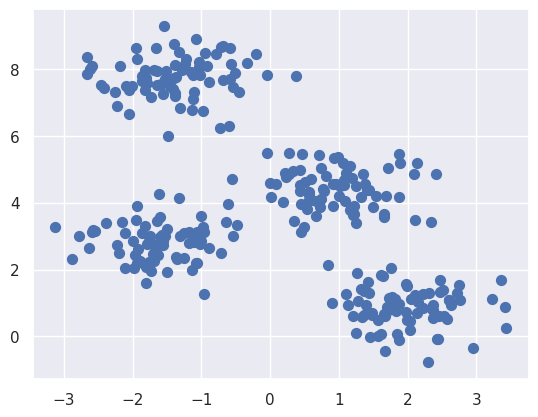

In [13]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

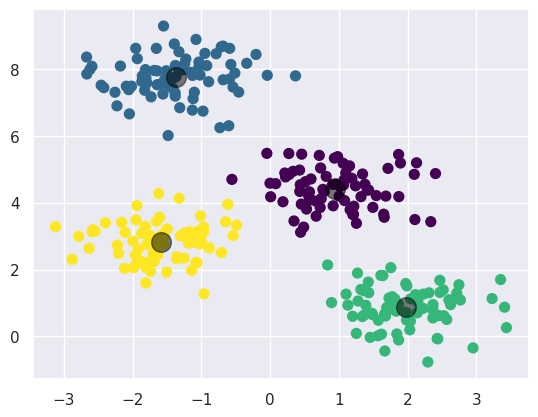

In [15]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

algortima expectation maximazation

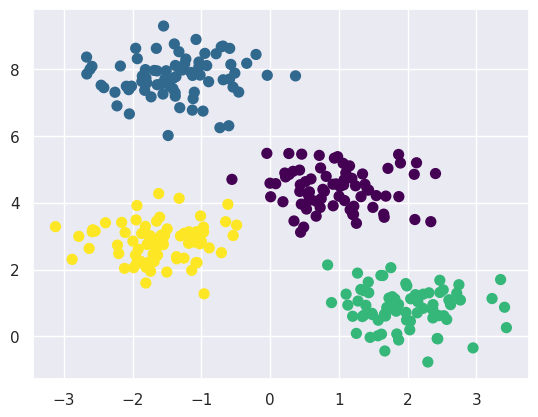

In [16]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # 2a. input label center yang baru
        labels = pairwise_distances_argmin(X, centers)

        # 2b. update center dari titik baru
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])

        # 2c. cek konvergensi
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

perubahan random

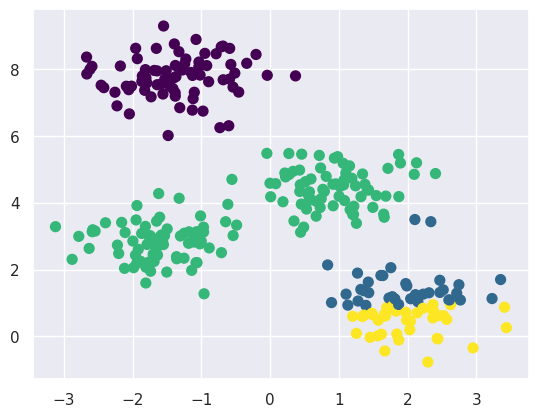

In [18]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

optimalisasi jumlah klaster

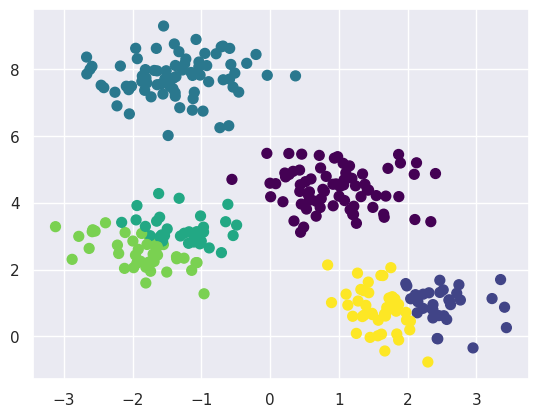

In [19]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

Batas klaster yang tidak selalu linear

In [20]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

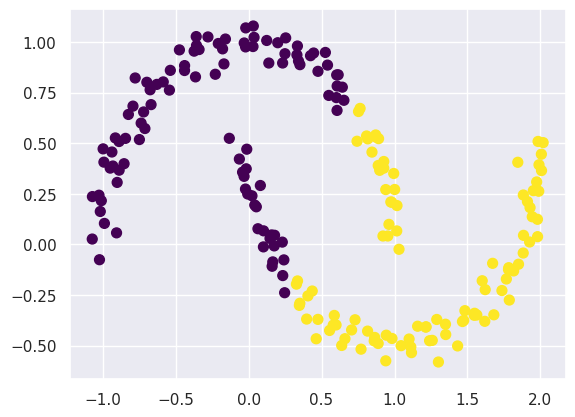

In [21]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


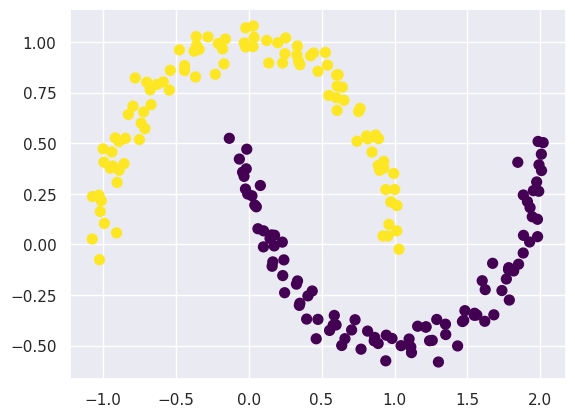

In [22]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

contoh kasus 1

In [23]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [24]:
# terapkan K-Means
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

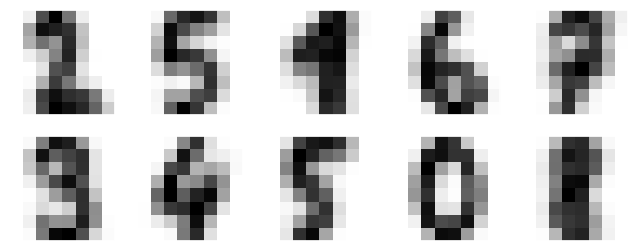

In [25]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [26]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7440178074568725

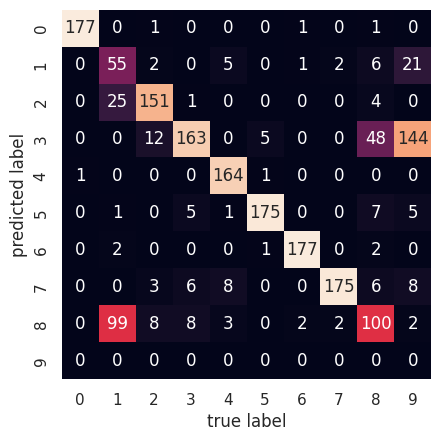

In [28]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [29]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# hitung klaster
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# permutasi label
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# hitung akurasi
accuracy_score(digits.target, labels)

0.9410127991096272

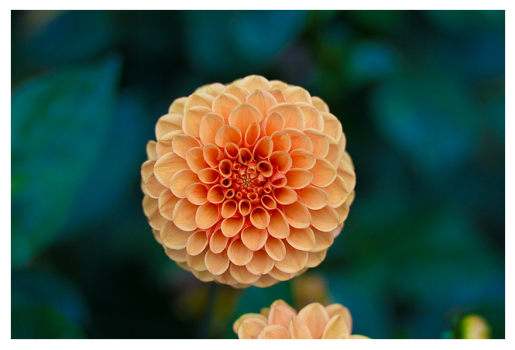

In [30]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower);

In [31]:
flower.shape

(427, 640, 3)

In [32]:
data = flower / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [33]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

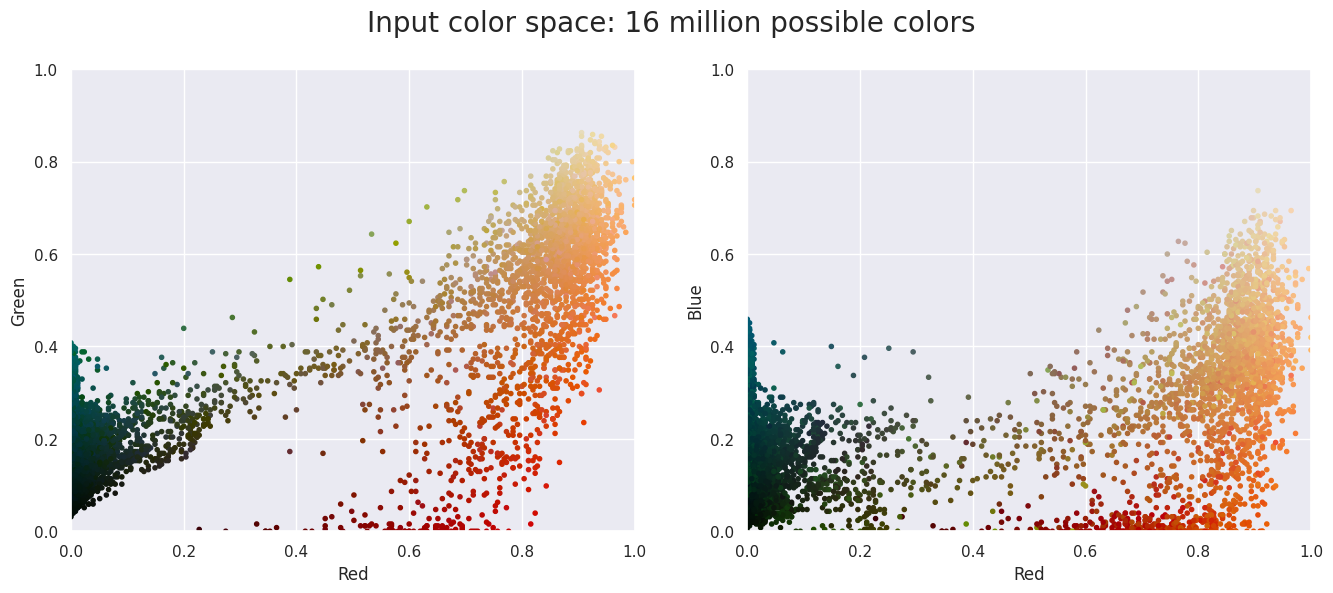

In [34]:
plot_pixels(data, title='Input color space: 16 million possible colors')

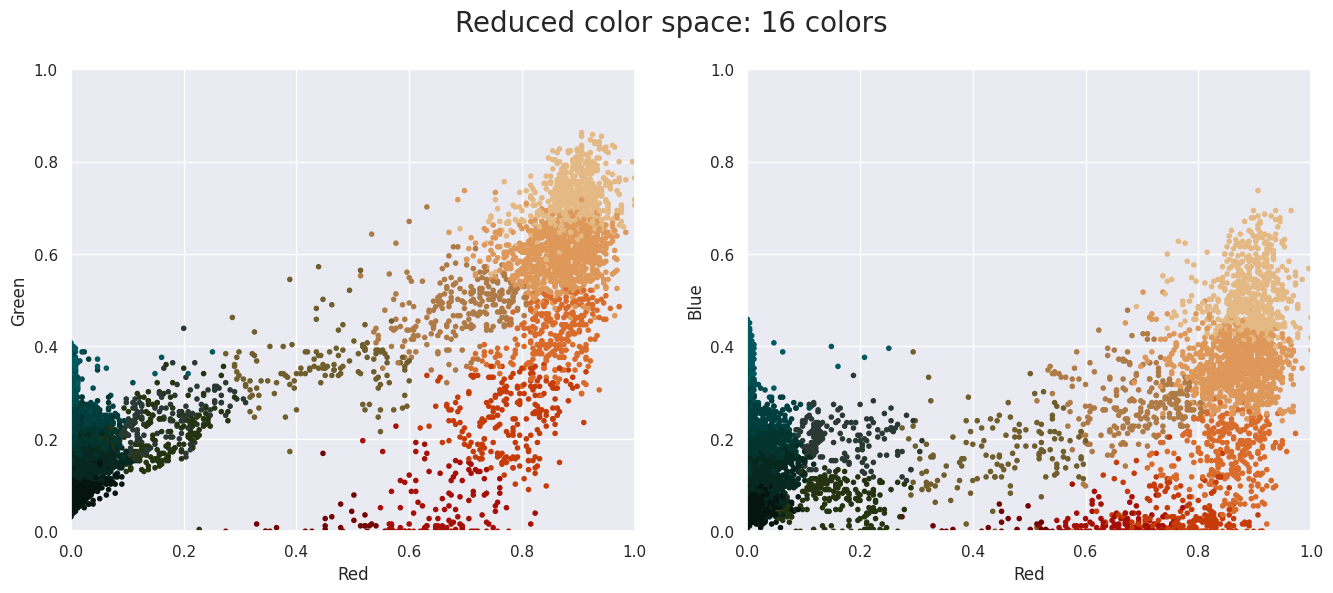

In [35]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

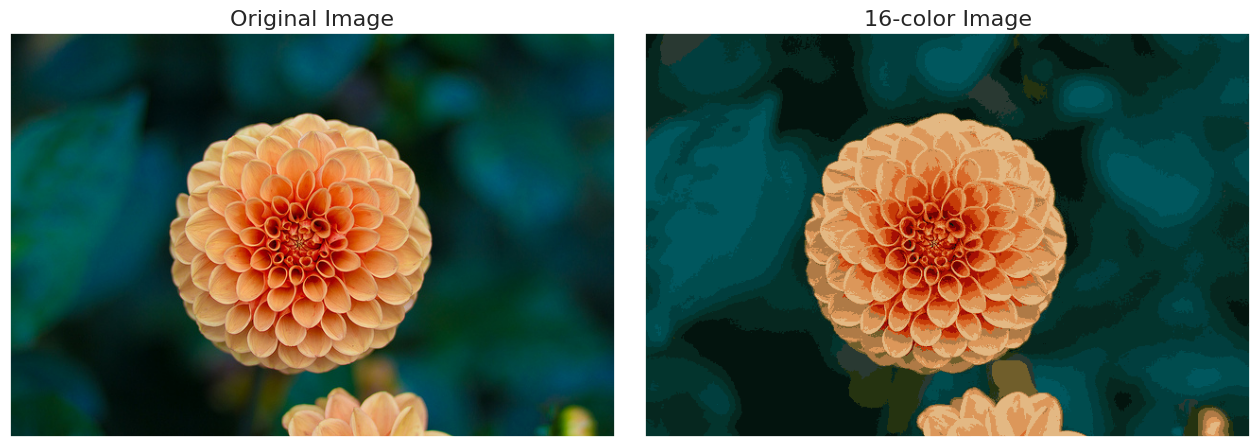

In [36]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);

#Praktikum 3

In [38]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

# Scale the data
X = StandardScaler().fit_transform(X)


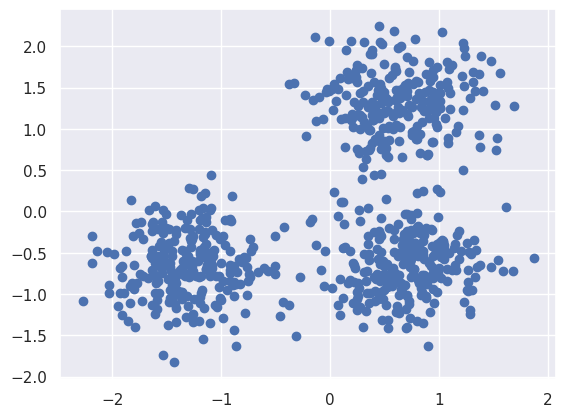

In [40]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

# Standardize the data
X = StandardScaler().fit_transform(X)

# Visualization
plt.scatter(X[:, 0], X[:, 1])
plt.show()


Compute DBSCAN

In [42]:
import numpy as np

from sklearn import metrics
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 18


In [44]:
print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, labels):.3f}")
print(
    "Adjusted Mutual Information:"
    f" {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}"
)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


visualisasi hasil klasterisasi

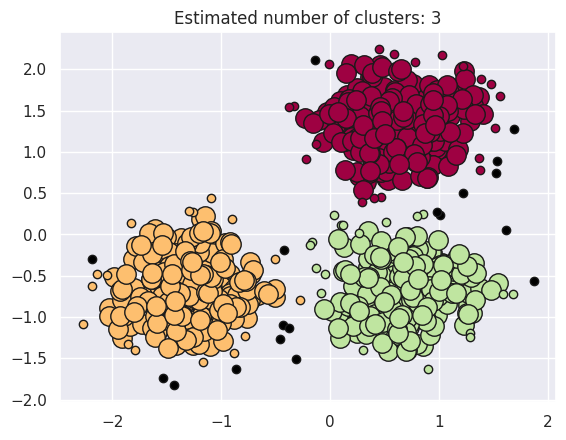

In [46]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

##TUGAS PRAKTIKUM

In [48]:
# Import library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/MachineLearning/Mall_Customers.csv')

# Tampilkan 5 baris pertama
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


memilih fitur yang tepat

In [49]:
# Pilih 2 fitur penting
features = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standarisasi data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Konversi kembali ke DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=['Annual Income (scaled)', 'Spending Score (scaled)'])
scaled_df.head()


,Annual Income (scaled),Spending Score (scaled)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


menentukan jumlah cluster optimal

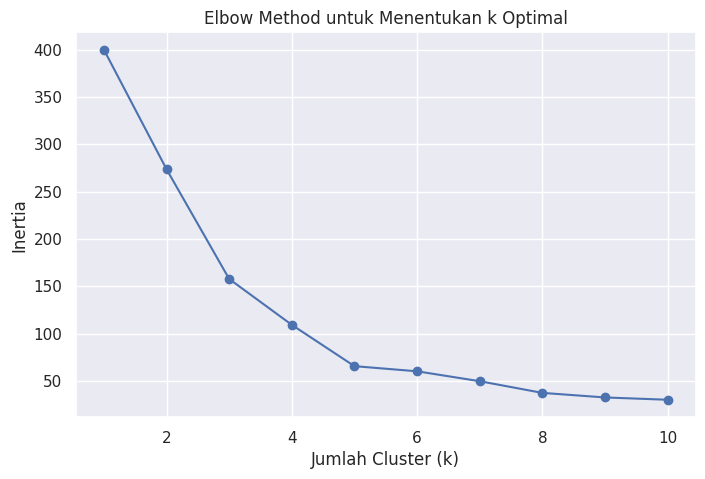

In [50]:
# Gunakan Elbow Method untuk mencari jumlah cluster optimal
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

# Visualisasi Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method untuk Menentukan k Optimal")
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Inertia")
plt.show()


In [51]:
# Membuat model K-Means dengan k terbaik (misal k = 5)
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_df)

# Lihat data dengan label cluster
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


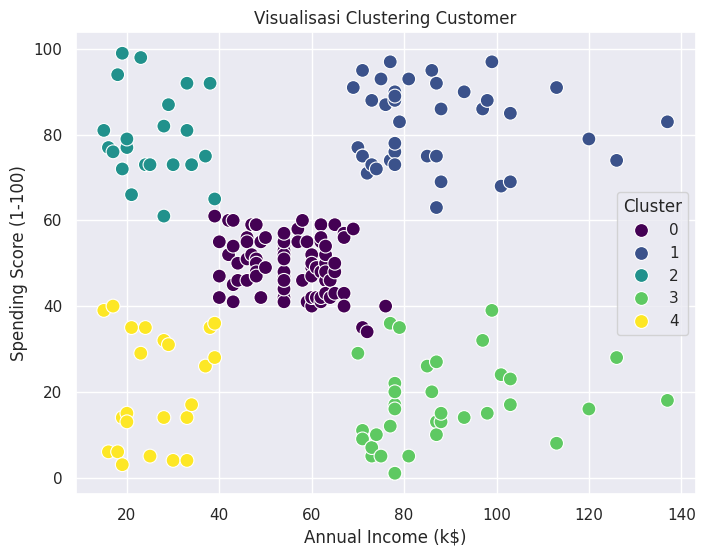

In [52]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='viridis',
    s=100
)

plt.title("Visualisasi Clustering Customer")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title="Cluster")
plt.show()


DBSCAN

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import (
    homogeneity_score, completeness_score, v_measure_score,
    adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
)


Membuat Dataset dan Normalisasi

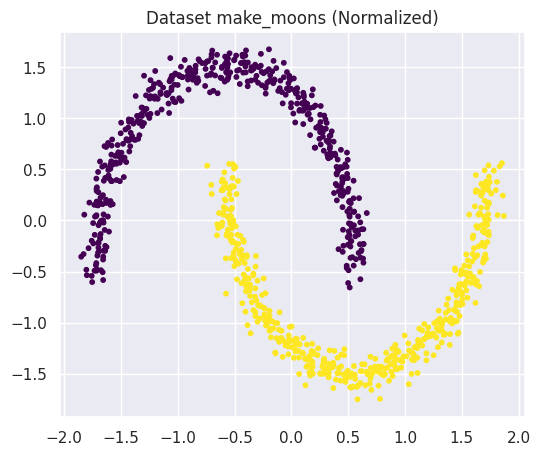

In [64]:
# Membuat dataset make_moons
X, y_true = make_moons(n_samples=1000, noise=0.05, random_state=42)

# Normalisasi data agar fitur punya skala sama
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualisasi data awal
plt.figure(figsize=(6,5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], s=10, c=y_true, cmap='viridis')
plt.title("Dataset make_moons (Normalized)")
plt.show()


Menjalankan DBSCAN

In [65]:
# DBSCAN dengan eps=0.2 dan min_samples=5
db = DBSCAN(eps=0.2, min_samples=5)
labels = db.fit_predict(X_scaled)  # -1 artinya noise

# Hitung jumlah cluster (tidak termasuk noise)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Jumlah cluster yang terbentuk: {n_clusters}")
print(f"Jumlah titik yang dianggap noise: {n_noise}")


Jumlah cluster yang terbentuk: 2
Jumlah titik yang dianggap noise: 0


Langkah 4: Evaluasi Kualitas Clustering

In [66]:
# Evaluasi jika cluster lebih dari 1
if n_clusters > 1:
    print("=== Evaluasi Clustering ===")
    print("Homogeneity Score   :", homogeneity_score(y_true, labels))
    print("Completeness Score  :", completeness_score(y_true, labels))
    print("V-Measure Score     :", v_measure_score(y_true, labels))
    print("Adjusted Rand Index :", adjusted_rand_score(y_true, labels))
    print("Adjusted Mutual Info:", adjusted_mutual_info_score(y_true, labels))
    print("Silhouette Score    :", silhouette_score(X_scaled, labels))
else:
    print("Clustering tidak valid, hanya noise yang terdeteksi.")


=== Evaluasi Clustering ===
Homogeneity Score   : 1.0
Completeness Score  : 1.0
V-Measure Score     : 1.0
Adjusted Rand Index : 1.0
Adjusted Mutual Info: 1.0
Silhouette Score    : 0.3911598537138403


Langkah 5: Visualisasi Hasil DBSCAN

*   List item
*   List item



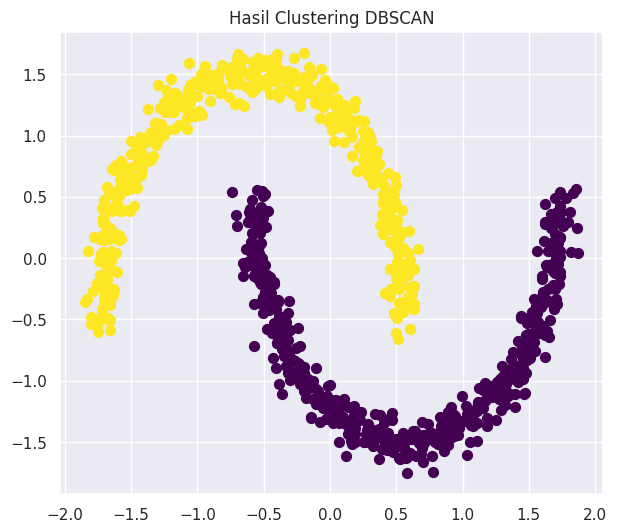

In [67]:
# Identifikasi core sample
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Warna untuk setiap cluster
unique_labels = set(labels)
colors = [plt.cm.viridis(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(7,6))
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Noise hitam

    class_member_mask = (labels == k)

    # Core samples → titik besar
    xy = X_scaled[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=50, c=[col], marker='o')

    # Non-core samples → titik kecil
    xy = X_scaled[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=20, c=[col], marker='.')

plt.title("Hasil Clustering DBSCAN")
plt.show()


Langkah 6: Eksperimen dengan Berbagai Parameter

In [68]:
eps_values = [0.05, 0.1, 0.2, 0.3, 0.5]
min_samples_values = [3, 10, 20]

results = []

for eps in eps_values:
    for min_s in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_s).fit(X_scaled)
        labels = db.labels_

        # Hitung cluster dan noise
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)

        # Evaluasi jika cluster lebih dari 1
        if n_clusters > 1:
            homo = homogeneity_score(y_true, labels)
            comp = completeness_score(y_true, labels)
            v_meas = v_measure_score(y_true, labels)
            ari = adjusted_rand_score(y_true, labels)
            ami = adjusted_mutual_info_score(y_true, labels)
            sil = silhouette_score(X_scaled, labels)
        else:
            homo = comp = v_meas = ari = ami = sil = np.nan

        results.append({
            'eps': eps,
            'min_samples': min_s,
            'clusters': n_clusters,
            'noise': n_noise,
            'Homogeneity': homo,
            'Completeness': comp,
            'V-Measure': v_meas,
            'ARI': ari,
            'AMI': ami,
            'Silhouette': sil
        })

# Hasil sebagai DataFrame
results_df = pd.DataFrame(results)
results_df


,eps,min_samples,clusters,noise,Homogeneity,Completeness,V-Measure,ARI,AMI,Silhouette
0,0.05,3,69,186,0.815554,0.152548,0.257021,0.030044,0.243805,0.112929
1,0.05,10,3,970,0.030669,0.126764,0.049389,0.002283,0.045864,-0.294190
2,0.05,20,0,1000,NaN,NaN,NaN,NaN,NaN,NaN
3,0.10,3,2,14,0.986207,0.902896,0.942714,0.972179,0.942634,0.251690
4,0.10,10,7,57,0.943317,0.409546,0.571132,0.523399,0.569801,0.162306
5,0.10,20,6,850,0.153928,0.155466,0.154693,0.016754,0.150916,-0.360195
6,0.20,3,2,0,1.000000,1.000000,1.000000,1.000000,1.000000,0.391160
7,0.20,10,2,0,1.000000,1.000000,1.000000,1.000000,1.000000,0.391160
8,0.20,20,2,3,1.000000,0.974224,0.986944,0.994030,0.986923,0.027580
9,0.30,3,2,0,1.000000,1.000000,1.000000,1.000000,1.000000,0.391160
